In [11]:
from numpy import *
from pylab import plt

### Physical Constants

In [12]:
σ  = 5.67e-8              # W/m²/K⁴ Stefan-Boltzman constant
T0 = 273.16               # K       0 = C
Sc = 1367.0               # W / m²  solar constant

### Stefan-Boltzmann Law

In [13]:
def SB_P(T):
    """P(T)"""
    return SB * T**4

def SB_T(P):
    """T(P)"""
    T2 = sqrt(P/SB)
    T4 = sqrt(T2)
    return T4

### Earth Data

In [14]:
RE = 6371028.6            # m       earth radius
AE = 4.0 * pi * RE**2     # m^2     earth surface
AC = pi * RE**2           # m^2     earth cross section
a  = 0.3                  #         aerth albedo

#### Mean power per m², that has to be radiated to space

In [15]:
P_0 = AC/AE * Sc * (1.0 - a)
print("P_0 = %5.2f W/m²" % (P_0))

P_0 = 239.22 W/m²


#### Mean Surface Temperature
Without green house effect the mean surface temperature would be:

$T_0 = (P_0/σ)^{(1/4)}$

In [16]:
T_0 = (P_0/σ)**(1/4)
print("T_0 = %5.2f K" % (T_0))

T_0 = 254.86 K


#### Assumption

A given part b of the surface is at temperature $T_h$ and the rest of the surface (1-b) at $T_l$

In [17]:
b = 0.25

If all the power is emitted from the part b the temperature $T_{max}$ has to be:

In [18]:
P_max = AC/(b*AE) * Sc * (1.0 - a)
T_max = (P_max/σ)**(1/4)
print("P_max = %5.2f W/m²" % (P_max))
print("T_max = %5.2f K" % (T_max))

P_max = 956.90 W/m²
T_max = 360.43 K


The temperature $T_h$ of the hotter part of the surface is assumed to be in the range $[T_0, T_{max}]$ :

In [19]:
T_h  = mgrid[T_0:T_max:200j]

The power emitted by the hot part is:

In [32]:
P_h  = σ * T_h**4 * b

Power that has to emitted by the lower temperature part of the earth's surface:

In [37]:
P_l  = P_0 - P_h
P_l  = where(P_l >= 0.0, P_l, 0.0)

The lower temperature $T_l$ is:

In [38]:
T_l  = (P_l/σ/(1-b))**(1/4)  

the power $P_h$ radiated by the hotter part:

In [39]:
P_h  = σ * T_h**4 * (1-b)

The mean temperature is given by:

In [35]:
T_m = T_h * b + T_c * (1-b)

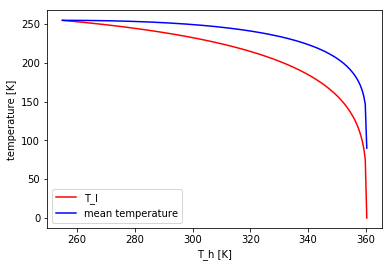

In [36]:
plt.plot(T_h, T_l, 'r', label="T_l")
plt.plot(T_h, T_m, 'b', label="mean temperature")
plt.xlabel("T_h [K]")
plt.ylabel("temperature [K]")
plt.legend(loc = 'best')

The result shows that the mean temperature is highest when the temperature is asumed to be homogeneously distributed over the earth's surface.

## Mean Temperature

The mean surface temperature is determined to be $288 K$.

In [34]:
T_earth = 288.0          # K mean - measured surface temerature of the earth
P_rad = σ * T_earth**4   # W/m²   - mean emitted power
P_ath = P_rad - P_0      # power that is blocked by the athmosphere

print("P_rad = %5.3f W/m²" % P_rad)
print("P_ath = %5.3f W/m²" % P_ath)

P_rad = 390.079 W/m²
P_ath = 150.854 W/m²
